In [1]:
import re
import json
import pickle
import numpy as np
import pandas as pd

import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
from IPython.display import Image

In [2]:
data_folder = '../data'
model_folder = '../model'

train_dataset = 'train_compas_processed.xlsx'
validate_dataset = 'validate_compas_processed.xlsx'
model_colums_sample = 'model_colums_sample.xlsx'

model_file_name = 'rf_recidivism_prediction.sav'

### Load model

In [3]:
rf = pickle.load(open(model_folder+'/'+model_file_name, 'rb'))

columns = pd.read_excel (data_folder+'/'+model_colums_sample).columns

In [4]:
result_folder = '../audit_result'
filename = 'forest_tree_interpretation'

In [5]:
def plot_tree(estimators, columns, folder, filename='tree'):
    
    result = []
    dotfile = six.StringIO()
    
    for i, tree_in_forest in enumerate(estimators):

        export_graphviz(tree_in_forest, \
                        out_file='tree.dot',\
                        feature_names=columns,\
                        filled=True,\
                        rounded=True
                       )
        
        (graph,) = pydot.graph_from_dot_file('tree.dot')
        name = folder + '/' + filename + '_' + str(i) +  '.png'
        graph.write_png(name)
        result.append(name)
        #os.system('dot -Tpng tree.dot -o tree.png')
        i +=1
        
    return result

In [6]:
plots = plot_tree([rf.estimators_[0],rf.estimators_[2],rf.estimators_[5]], columns, result_folder, filename)

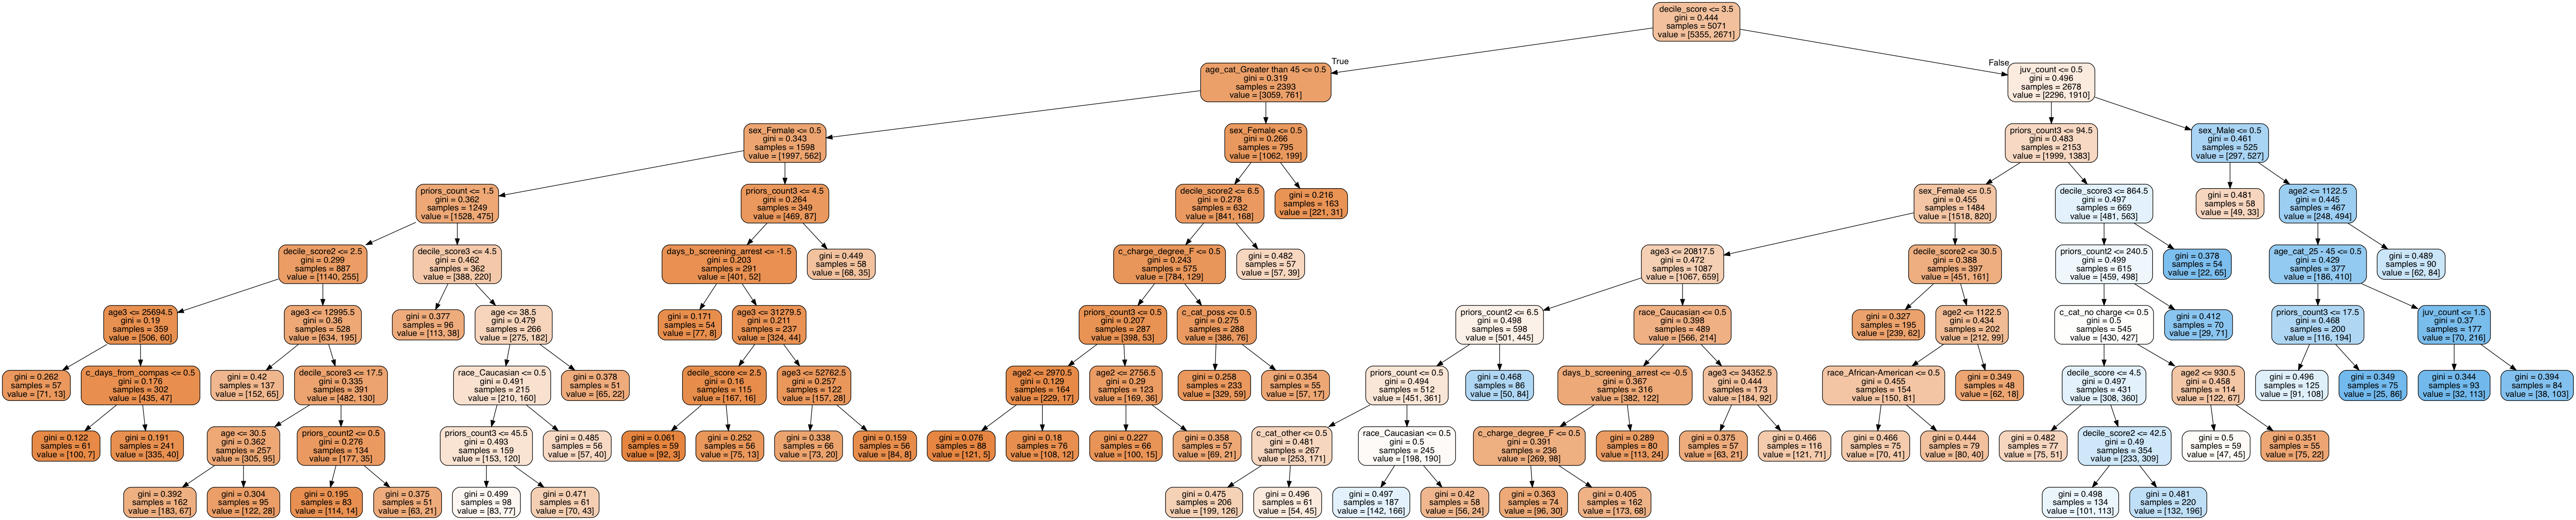